# Final Project: Proposal

Title: Something something review score from pictures.

Ziv Branstein 301782215

Avishai Fuss 332658608

### Contents
* [Project Goals](#first-bullet)
* [Motivation](#second-bullet)
* [Data Exploration](#third-bullet)
* [Solution Design](#fourth-bullet)
* [Initial Results](#fifth-bullet)

### Project Goals <a class="anchor" id="first-bullet"></a>

Given a product class, we aim to determine whether a picture of a product from said class can be used to accurately predicate customer product ratings.







###  Motivation <a class="anchor" id="second-bullet"></a>

Online shopping has been on the rise for some time now around the world, while traditional brick-and-mortar businesses struggle to compete. For instance, in the US over the past ten years, e-commerce has grown at a rate ~4x faster than that of retail overall.

![alt text](https://drive.google.com/uc?id=10qsPsFmOaztfLJZhwP8Vhg4NkWRBU9IM)

This shifting landscape has brought vast changes to the customer experience and has impacted the way customers make purchasing decisions. Rather than browsing the aisles at a local store, consumers can survey a wide variety of options from several competitors at once. They're no longer limited to the inventory and shelf space of a physical store. 

Online reviews are the biggest game changer. The online experience offers consumers the chance to get neutral third-party feedback from others who have already tried the product. This is a superior alternative to getting advice from retail sales associates who are incentivized to push products. It's no wonder that, according to Northwestern University's Spiegel Research Center, [almost 95% of online shoppers consult reviews before making a purchase](https://spiegel.medill.northwestern.edu/_pdf/Spiegel_Online%20Review_eBook_Jun2017_FINAL.pdf). 

It comes as no surprise, then, that businesses tend to invest heavily in curating their online reputation in ways that have eroded consumer trust in online reviews. One such example is [brushing](https://en.wikipedia.org/wiki/Brushing_(e-commerce)), where business owners buy their own products in order to post reviews as "verified" purchasers. Less dubious methods are common as well. The Spiegel Center report highlights several innocuous factors that can be manipulated to influence consumer behavior. 

![alt text](https://drive.google.com/uc?id=13wYhV2yIvUjzIggWc9v9N3mFp8zzstXI)

What if we could just do away with the whole game of cat and mouse? In this project, we aim to test the hypothesis that product images alone are enough to glean information about customer reviews. If successful, this strategy has the potential to restore consumer trust in the world of online shopping. They say a picture is worth a thousand words...



### Data Exploration <a class="anchor" id="third-bullet"></a>

This hypothesis is obviously relevant only to certain sectors. Customers likely don't care what the insulation in their house looks like, as long as it gets the job done. We've chosen to test our hypothesis on relevent segments of the [Yelp dataset](https://www.yelp.com/dataset) - an extensive collection of reviews and ratings for businesses located in 11 metropolitan areas. In order to make reasonable comparisons, we've narrowed our scope to reviews of pizzarias. 

In [1]:
import json
import os
import pandas as pd
from IPython.display import Image

In [2]:
pizza_businesses = []
with open('yelp_academic_dataset_business.json', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'Pizza' in (line_json.get('categories') or ''):
            pizza_businesses.append(line_json)
print(f"There are {len(pizza_businesses)} pizzarias on yelp's dataset")

There are 7302 pizzarias on yelp's dataset


In [3]:
pizza_business_ids = set([pizza_business['business_id'] for pizza_business in pizza_businesses])
pizza_reviews = []
with open('yelp_academic_dataset_review.json', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if line_json['business_id'] in pizza_business_ids:
            pizza_reviews.append(line_json)
print(f"And a total of {len(pizza_reviews)} reviews")

And a total of 479792 reviews


In [4]:
pizza_df = pd.DataFrame(pizza_reviews)
pizza_df = pizza_df.set_index("review_id")
pizza_df.describe()

,stars,useful,funny,cool
count,479792.000000,479792.000000,479792.000000,479792.000000
mean,3.708130,1.059109,0.453807,0.513481
std,1.448307,4.439882,4.160658,2.409803
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,1122.000000,976.000000,502.000000


We combine yelp's dataset with the reviews' images by scraping their website. After scraping 2,500~ photos of reviews, many of them were photos of unrelated dishes, menus or even people. We cleaned up the photos using a pretrained network(Xception) and left with 800~ photos of (mostly) pizza.

#### Here are a couple examples of 1 star reviews and their respective review:

Review: I like sauce, but I'm going to give them 1 star for thinking it's ok to burn a pizza, box it up and not mention it to me when I came in to pick it up. I'm now home and practically snapping my teeth when I take a bite. I'm too tired to take it back and demand they make another. Poor decision on their part to pull this crap.


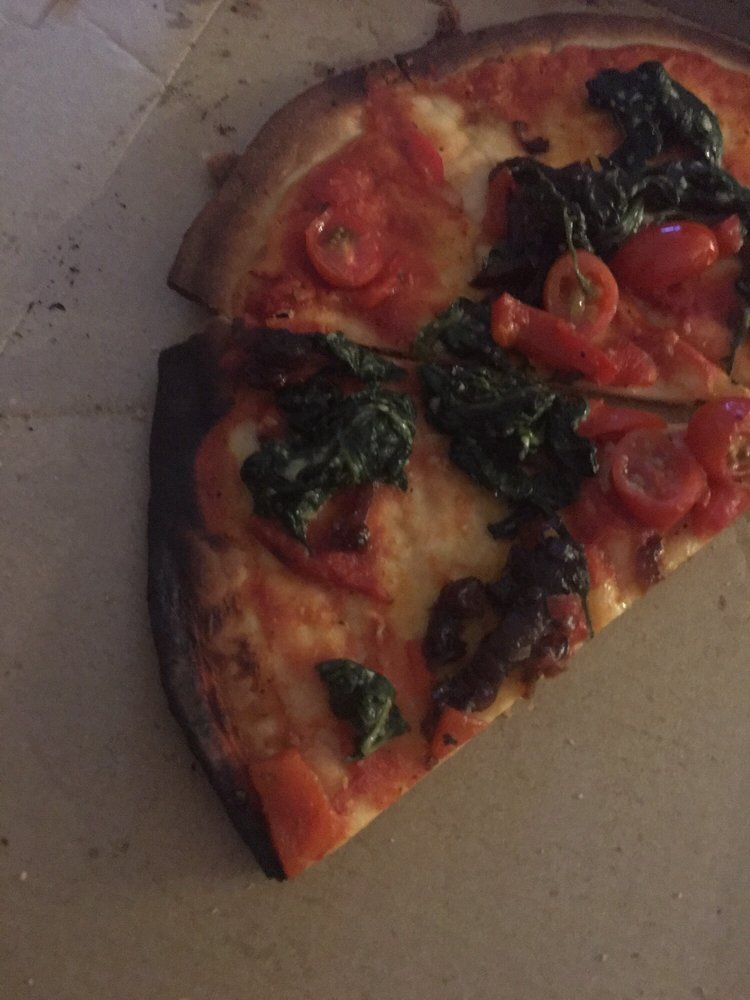

In [5]:
print(f'Review: {pizza_df.loc["cpt9ySBm6p8QjyUioLChUw", "text"]}')
Image(filename=os.path.join("review_photos", "cpt9ySBm6p8QjyUioLChUw", "0.jpg"), width=300, height=300)

Review: Obvious this restaurant is not familiar with GOOD GREAT coal fire pizza.
This had to be one of the worst pizza, if that's what you want to call it, I have had.
It was a pita bread texture with minimal about of tomatoes.  I mean minimal.
Cheese harden quickly and I didn't see one piece of basil.
Being 100% Italian I had to share my thoughts about this terrible experience.
 On a positive note, the salad was good.


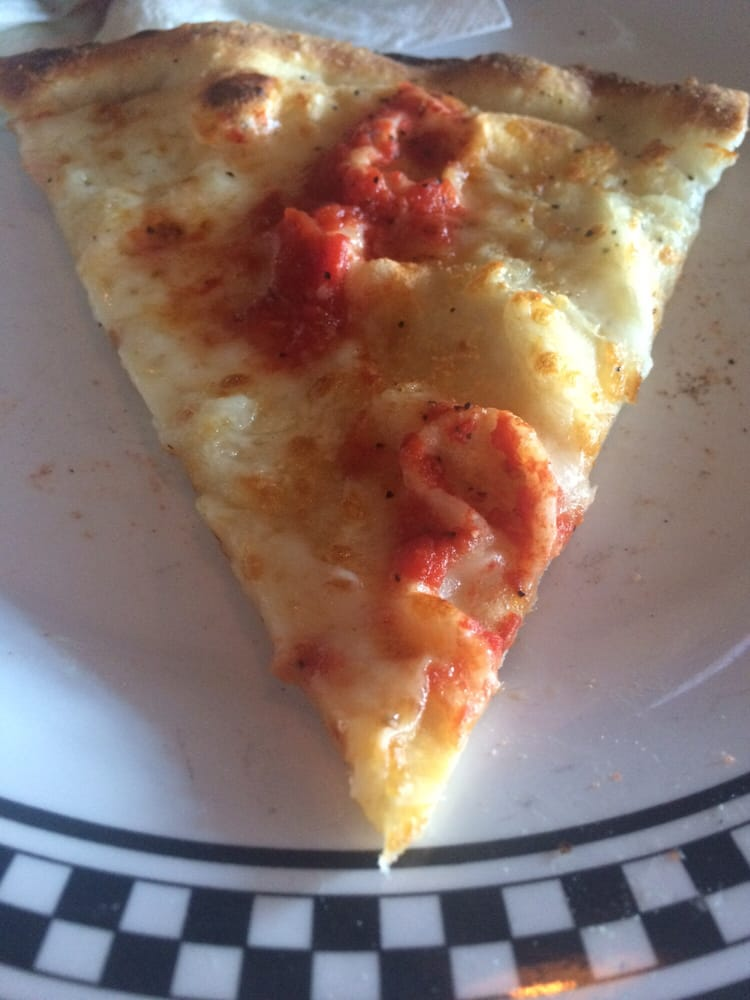

In [6]:
print(f'Review: {pizza_df.loc["-snGZCUWiW_Lyp3kKtObFA", "text"]}')
Image(filename=os.path.join("review_photos", "-snGZCUWiW_Lyp3kKtObFA", "0.jpg"), width=300, height=300)

#### And here are a couple examples of 5 star reviews and their respective review:

Review: Delicious huge slices for reasonable prices. They bring the pizza to your table and they also have wifi.


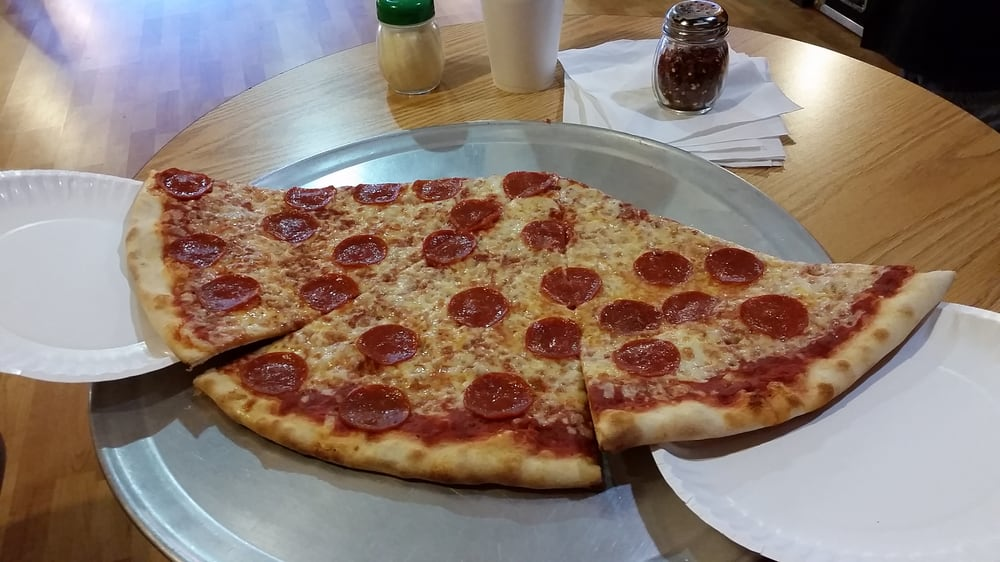

In [7]:
print(f'Review: {pizza_df.loc["n6l8Q8SzHiz60NPOsUVAcQ", "text"]}')
Image(filename=os.path.join("review_photos", "n6l8Q8SzHiz60NPOsUVAcQ", "0.jpg"), width=300, height=300)

Review: Tried Pizza Fire for the first time tonight and loved it! Purchased two pizzas to go and chose a variety of toppings. All very yummy! My niece tried the margherita and devoured it. Our family will definitely return again and again! It's great to have local pizza that doesn't taste greasy or overly processed like most chains do. Crust has a great texture and the flavors are exactly what you'd want from a fresh pizza. Worth the visit!


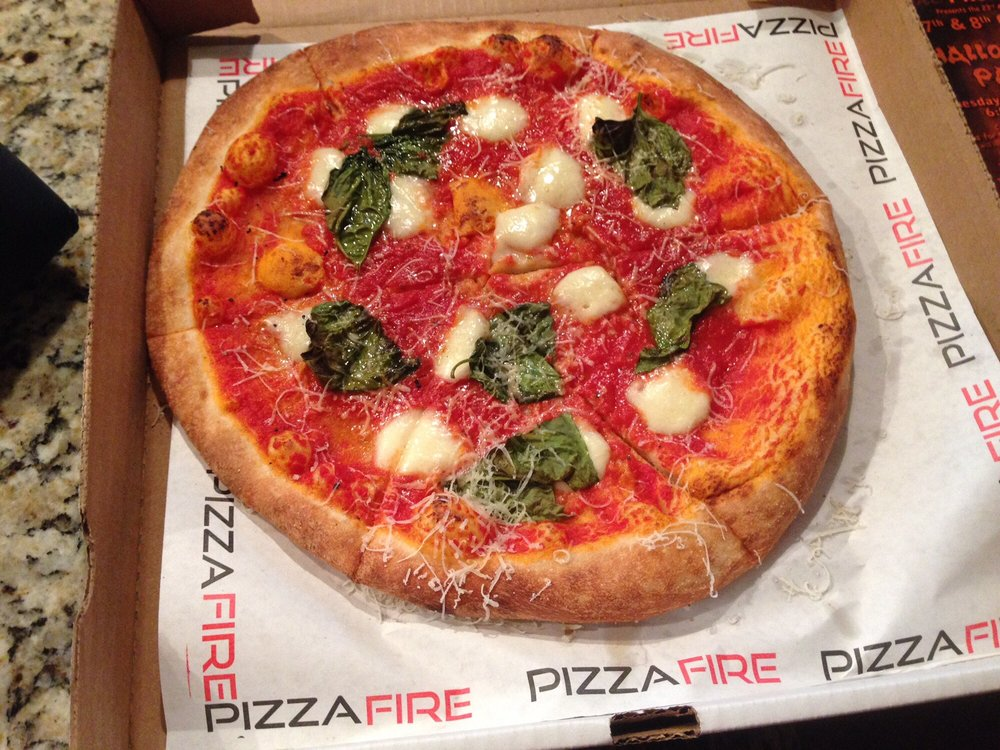

In [8]:
print(f'Review: {pizza_df.loc["yRyd_0zqdM6ZepbX24K0qg", "text"]}')
Image(filename=os.path.join("review_photos", "yRyd_0zqdM6ZepbX24K0qg", "0.jpg"), width=300, height=300)

### Solution Design <a class="anchor" id="fourth-bullet"></a>

- some ideas: 
    - classify the image against the review
    - seperately, classify the text against the review
    - component analysis: see if the classification is stronger with the text, without, different types of image classification strategies, feature extraction etc...
    - try different preprocesssing methods / filtering to see what improves results
    something else: can it be a chain? pic predicts the text which predicts the final score?
    - feature extraction: understand what people like about what theyre scoring high / what they don't like about what theyre scoring low

### Initial Results <a class="anchor" id="fifth-bullet"></a>